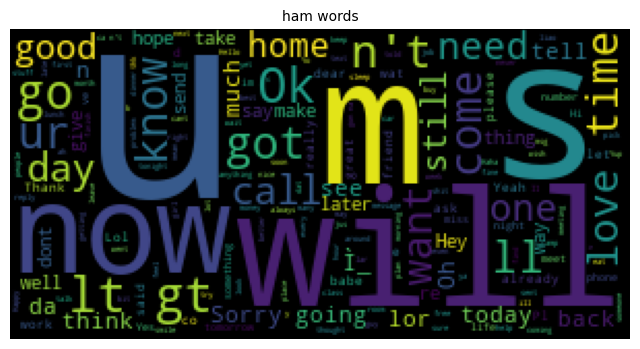

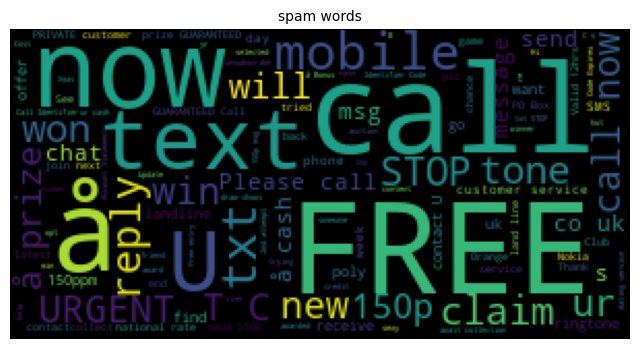

2941    ham  Hello. No news on job, they are making me...
4384    spam  Do you want a New Nokia 3510i Colour Pho...
3372    ham  Looks like you found something to do othe...
3075    ham  Mum, hope you are having a great day. Hop...
4789    ham  Yup. Izzit still raining heavily cos i'm ...
2586    ham  If you don't respond imma assume you're s...
5442    ham  I thought i'd get him a watch, just cos t...
4020           ham  We have to pick rayan macleran there.
1230    ham  I want to send something that can sell fa...
3570                  ham  But you dint in touch with me.
dtype: object


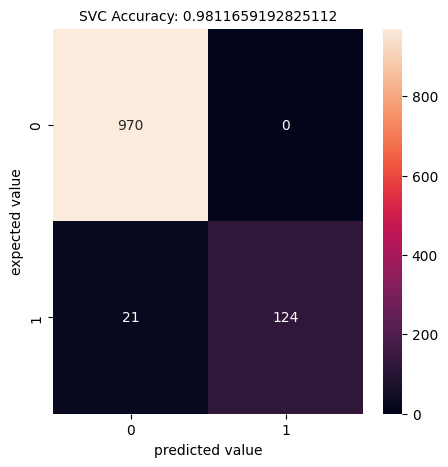

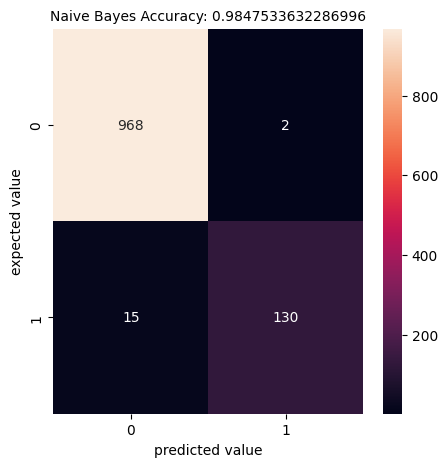

In [46]:
##18/11/2022 Adam Townsend 8533007
##6006CEM
##Using Support Vector Machines and Naiive Bayes to help detect spam emails
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plot
import nltk
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

#open the dataset and set encoding value, select the appropriate columns
spam = pd.read_csv("spam.csv", encoding = "ISO-8859-1", usecols=["v1","v2"])        
spam.columns = ["Column1","Column2"]

column1 = spam.Column1
column2 = spam.Column2

#create the dataframe
df = pd.DataFrame(spam)
df = df.drop_duplicates()

hams = ''
spams = ''

#collecting all of the words in the ham emails
for i in df[df['Column1'] == "ham"].Column2:
    tokens = nltk.word_tokenize(i)
    for j in tokens:
        hams = hams + j + ' '

#collecting all of the words in the spam emails
for i in df[df['Column1'] == "spam"].Column2:
    tokens = nltk.word_tokenize(i)
    for j in tokens:
        spams = spams + j + ' '


ham_wordcloud = WordCloud(width=300, height=150).generate(hams)
spam_wordcloud = WordCloud(width=300, height=150).generate(spams)

#make the wordcloud for all of the ham words
plot.figure( figsize=(8,6))
plot.imshow(ham_wordcloud)
plot.axis("off")
plot.title("ham words", fontsize =10)
plot.show()

#make the wordcloud for all of the spam words
plot.figure( figsize=(8,6))
plot.imshow(spam_wordcloud)
plot.axis("off")
plot.title("spam words", fontsize =10)
plot.show()


#change 'spam' and 'ham' into integers
df = df.replace(['spam','ham'],[1, 0])

#select our date to train and what to test it against
column1_train, column1_test, column2_train, column2_test = train_test_split(column1,column2,test_size = 0.2)
print(column1_test.head(10) + "  " + column2_test.head(10))


#splits every word in every email up and assigns it a number, the program will now be able to track how many times it occurs in other emails.
cv= CountVectorizer()
word_count = cv.fit_transform(column2_train)        
word_count_test = cv.transform(column2_test)

#assigns the value we expect to recieve
expect = column1_test

#Using the Support Vector Machines machine learning algorithm and create a confusion matrix with the results
svc = svm.SVC()     
svc.fit(word_count,column1_train)
predict = svc.predict(word_count_test)
matrix = confusion_matrix(expect, predict)
plot.subplots(figsize =(5,5))
sns.heatmap(matrix,annot = True,fmt = ".0f")
plot.xlabel("predicted value")
plot.ylabel("expected value")
plot.title("SVC Accuracy: {}".format(svc.score(word_count_test,column1_test)), fontsize =10)
plot.show()

#Using the Naive Bayes machine learning algorithm and create a confusion matrix with the results
NB = MultinomialNB()        
NB.fit(word_count,column1_train)
predict = NB.predict(word_count_test)
matrix = confusion_matrix(expect, predict)
plot.subplots(figsize =(5,5))
sns.heatmap(matrix,annot = True,fmt = ".0f")
plot.xlabel("predicted value")
plot.ylabel("expected value")
plot.title("Naive Bayes Accuracy: {}".format(accuracy_score(predict,expect)), fontsize =10)
plot.show()

